<a href="https://colab.research.google.com/github/emilykokkinofta/thesis-code/blob/main/FHN_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phases

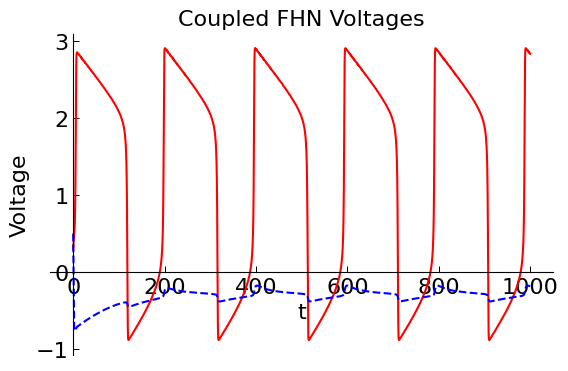

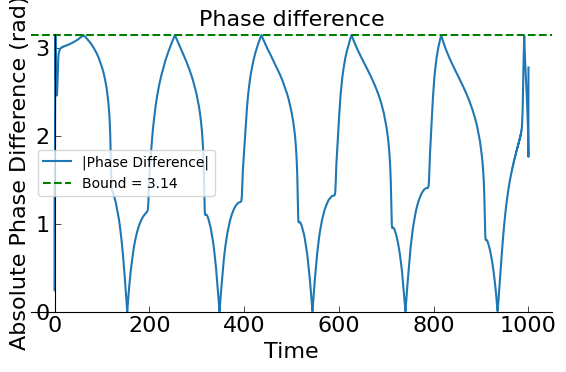

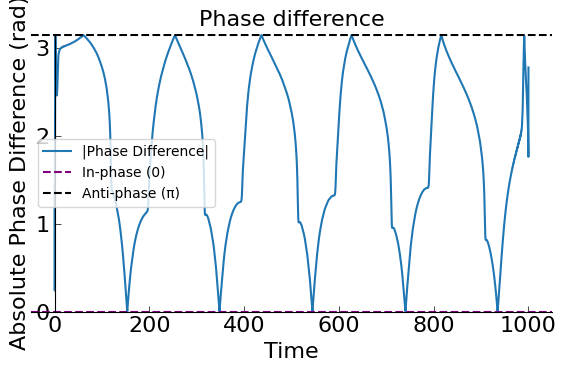

In [10]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import hilbert



plt.rcParams.update({
    'figure.figsize': (6, 4),
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    'xtick.major.width': 0.7,
    'ytick.major.width': 0.7,
    'legend.fontsize': 10,
    'font.size': 16
})

# --- Parameters ---
epsilon = 1/100
a = 0
b = 0.8
I1 = 1
I2 = -0.5
A12 = 0.1
A21 = 0.03



# --- FitzHugh-Nagumo system ---
def fhn_coupled(t, y):
    v1, w1, v2, w2 = y
    dv1 = -w1 + v1**2 - (1/3)*v1**3 + I1 + A12*(v2 - v1)
    dw1 = epsilon * (v1 - b * w1 + a)
    dv2 = -w2 + v2**2 - (1/3)*v2**3 + I2 + A21*(v1 - v2)
    dw2 = epsilon * (v2 - b * w2 + a)
    return [dv1, dw1, dv2, dw2]

  # --- Time setup ---
t_start = 0
t_end = 1000
dt = 0.1
t_eval = np.arange(t_start, t_end + dt, dt)

# --- Initial conditions ---
y0 = [0.3, 1, 0.5, 0.3]  # v1, w1, v2, w2

# --- Solve the system ---
sol = solve_ivp(fhn_coupled, [t_start, t_end], y0, t_eval=t_eval, method='RK45')

# --- Extract solutions ---
t = sol.t
v1 = sol.y[0]
w1 = sol.y[1]
v2 = sol.y[2]
w2 = sol.y[3]

# Plot voltage
fig, ax = plt.subplots(figsize=(6, 4))

# Move bottom spine (x-axis) to y=0 and left spine (y-axis) to x=0
ax.spines['bottom'].set_position(('data', 0))  # X-axis at y=0
ax.spines['left'].set_position(('data', 0))    # Y-axis at x=0

ax.plot(t, v1, color='red')
ax.plot(t, v2, color='blue', linestyle='--')

ax.set_xlabel('t')
ax.set_ylabel('Voltage')
ax.set_title('Coupled FHN Voltages')
plt.tight_layout()
plt.show()





# --- Compute and plot Hilbert transform of v1 ---
analytic_signal = hilbert(v1)
hilbert_v1 = np.imag(analytic_signal)

phase_v1 = np.arctan2(hilbert_v1, v1) #we are using arc tan2, instade of arctan because it is definefd on R/(0,0)
analytic_signal2 = hilbert(v2)
hilbert_v2 = np.imag(analytic_signal2)

phase_v2 = np.arctan2(hilbert_v2, v2)



# Absolute value: maps everything to [0,π]

dphi_wrapped = np.mod(phase_v1 - phase_v2, 2*np.pi)
dphi_abs = np.where(dphi_wrapped > np.pi, 2* np.pi - dphi_wrapped, dphi_wrapped)



# Ignore first 10% of the time to skip transients
cutoff_index = int(0.1 * len(t))
bound = np.max(dphi_abs[cutoff_index:])


#plot of phase difference bound
fig, ax = plt.subplots(figsize=(6, 4))

ax.set_ylim(0, 3.15)

# Move bottom spine (x-axis) to y=0 and left spine (y-axis) to x=0
ax.spines['bottom'].set_position(('data', 0))  # X-axis at y=0
ax.spines['left'].set_position(('data', 0))    # Y-axis at x=0

ax.plot(t, dphi_abs , label='|Phase Difference|')
ax.axhline(y=bound, color='green', linestyle='--', label=f'Bound = {bound:.2f}')
ax.set_ylabel('Absolute Phase Difference (rad)',fontsize=16)
ax.set_xlabel('Time',fontsize=16)
ax.set_title('Phase difference',fontsize=16)
plt.legend()
plt.grid(False)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set thinner ticks
ax.tick_params(width=0.5)
plt.tight_layout()
plt.show()

#phase difference plot

fig, ax = plt.subplots(figsize=(6, 4))

ax.set_ylim(0, 3.15)

# Move bottom spine (x-axis) to y=0 and left spine (y-axis) to x=0
ax.spines['bottom'].set_position(('data', 0))  # X-axis at y=0
ax.spines['left'].set_position(('data', 0))    # Y-axis at x=0

ax.plot(t, dphi_abs , label='|Phase Difference|')
plt.axhline(0, color='purple', linestyle='--', label='In-phase (0)')
plt.axhline(np.pi, color='black', linestyle='--', label='Anti-phase (π)')
ax.set_ylabel('Absolute Phase Difference (rad)',fontsize=16)
ax.set_xlabel('Time',fontsize=16)
ax.set_title('Phase difference',fontsize=16)
plt.legend()
plt.grid(False)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set thinner ticks
ax.tick_params(width=0.5)
plt.tight_layout()
plt.show()

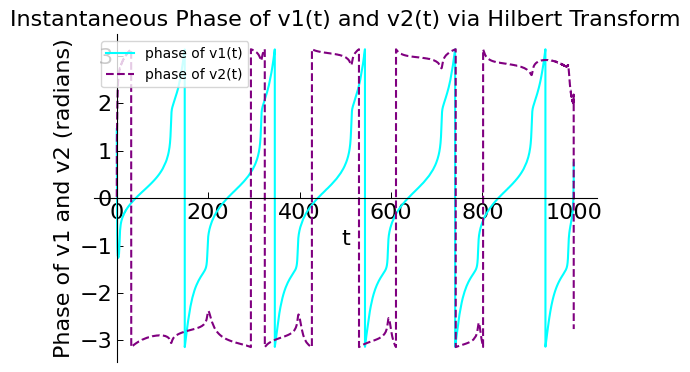

In [11]:
#phase plots

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(t, phase_v1,label='phase of v1(t)', color='cyan')
ax.plot(t, phase_v2, label='phase of v2(t)',color='purple',linestyle='--')
ax.set_xlabel('t')
ax.set_ylabel('Phase of v1 and v2 (radians)')
ax.set_title('Instantaneous Phase of v1(t) and v2(t) via Hilbert Transform')
# Move bottom spine (x-axis) to y=0 and left spine (y-axis) to x=0
ax.spines['bottom'].set_position(('data', 0))  # X-axis at y=0
ax.spines['left'].set_position(('data', 0))    # Y-axis at x=0

plt.legend()
plt.tight_layout()

plt.show()

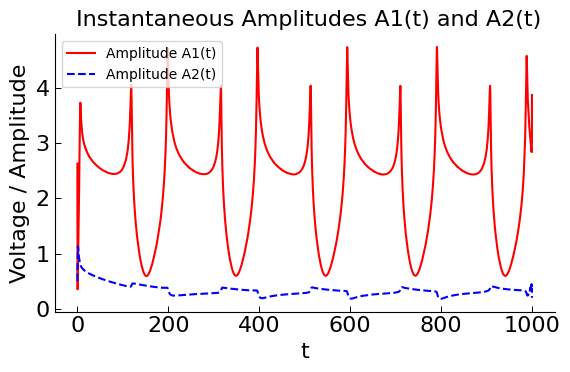

the maximum difference betweeen the instantenous amplitudes is 3.606288844604753


In [12]:



# Amplitude from analytic signal
amplitude_v1 = np.abs(analytic_signal)
amplitude_v2 = np.abs(analytic_signal2)

#Amplitude plot
fig, ax = plt.subplots()
ax.plot(t, amplitude_v1, label='Amplitude A1(t)', color='red')
ax.plot(t, amplitude_v2, label='Amplitude A2(t)', color='blue', linestyle='--')
ax.set_xlabel('t',fontsize=16)
ax.set_ylabel('Voltage / Amplitude',fontsize=16)
ax.set_title(' Instantaneous Amplitudes A1(t) and A2(t)',fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

max_ampl1 = np.max(amplitude_v1)
max_ampl2 = np.max(amplitude_v2)

amplitude_difference = np.abs(max_ampl1-max_ampl2)
print(f"the maximum difference betweeen the instantenous amplitudes is", amplitude_difference)


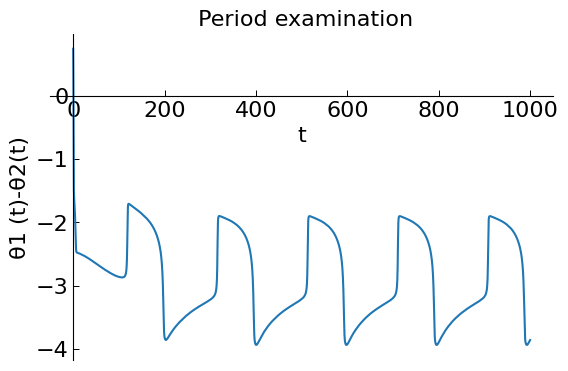

In [13]:
#period examination

theta1 = np.unwrap(np.arctan2(w1, v1))
theta2 = np.unwrap(np.arctan2(w2, v2))

#plots
fig, ax = plt.subplots()
# ax.set_ylim(0, 3.5)
ax.plot(t, theta1 - theta2)
ax.set_xlabel('t',fontsize=16)
ax.set_ylabel('θ1 (t)-θ2(t)',fontsize=16)
ax.set_title(' Period examination',fontsize=16)
ax.spines['bottom'].set_position(('data', 0))  # X-axis at y=0
ax.spines['left'].set_position(('data', 0))    # Y-axis at x=0
plt.tight_layout()
plt.show()

